In [1]:
from portfolio_helpers import *

Failed to get industry for APRN
Failed to get industry for IMBI
Failed to get industry for JMIA
Failed to get industry for RBZ
Failed to get industry for TKAT
Health Score: 4 / 5
Growth Score: 0 / 2
Value Score: 1 / 4
Analyst Target (45 analysts): 5.218803154476581%


5

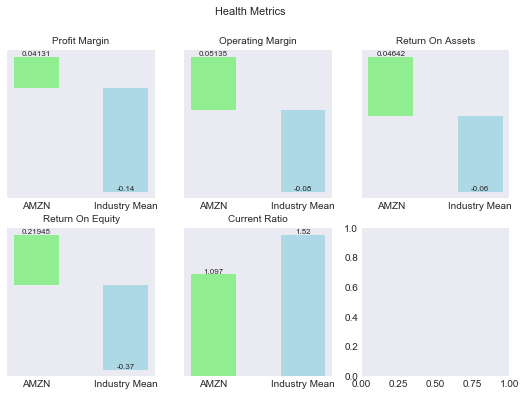

In [2]:
c = Company("AMZN")
c.fetch_data()
c.analyze()

In [2]:
portfolio = create_portfolio(["BABA", "AMZN", "AAPL", "BIDU", "SFUN", "REGN", "TSLA", "DDD", "NVDA"])
w = portfolio.calculate_optimal_weights()
print(w)
calculate_quantity_shares_per_ticker(portfolio, 200000)

[*********************100%***********************]  1 of 1 completed
Failed to find the company industry.
Expected Market Return: 0.010778898427873412
Expected Stdev of market return: 0.05409263386046319
Fetching Portfolio Data
[*********************100%***********************]  1 of 1 completed
Getting data for BABA
Expected return: 0.044766598907684994
Standard Deviation: 0.10404248851802232
Beta: 1.821218
Alpha: 0.025135875070670236
[*********************100%***********************]  1 of 1 completed
Failed to find the company industry.
Getting data for AMZN
Expected return: 0.04008643082973722
Standard Deviation: 0.08624392998667599
Beta: 1.250818
Alpha: 0.026603990655981458
[*********************100%***********************]  1 of 1 completed
Failed to find the company industry.
Getting data for AAPL
Expected return: 0.03317929648147814
Standard Deviation: 0.10201638383631007
Beta: 1.173542
Alpha: 0.02052980646263472
[*********************100%***********************]  1 of 1 comple

[265.44361539789713,
 36.23582378409583,
 172.73361018668425,
 -305.0390906123115,
 -35356.796599115616,
 25.955928611993446,
 18.517990315706204,
 -996.9929753477137,
 221.99996232278355]

In [7]:
w

array([0.11448706, 0.13235663, 0.1453855 , 0.36572849, 0.24204231])

In [4]:
[atvi, sne, ea, msft, cost]
w = [0.26934317, 0.12867101, 0.47506942, 0.04599636, 0.080920049]
print(p.calculate_sharpe_ratio(w, .0955, cov_matrix=cov_matrix))
print(p.calculate_sharpe_ratio([0.2, 0.1, 0.5, 0.1, 0.1], 0.0955, cov_matrix=cov_matrix))

0.4748825765244376
0.47215141125452564


In [7]:
w = [0.4, 0.4, 0.3]
p.calculate_sharpe_ratio(w, 9.5, cov_matrix=cov_matrix)

TypeError: can only concatenate str (not "float") to str

In [30]:
for price in data:
    print(price)
ase = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(len(data))]
print(date_list)

AttributeError: 'float' object has no attribute 'index'

In [9]:
data

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2020-04-09    573.000000
2020-04-13    650.950012
2020-04-14    709.890015
2020-04-15    729.830017
2020-04-16    745.210022
Name: Adj Close, Length: 2467, dtype: float64

In [4]:
rank_companies_by_score([company("MSFT"), company("NKE"), company("EIX"), company("SNE"), company("FB")])

Health Score: 4 / 4
Growth Score: 0 / 2
Value Score: 1 / 1
Health Score: 4 / 4
Growth Score: 0 / 2
Value Score: 0 / 1
Health Score: 2 / 4
Growth Score: 0 / 1
Value Score: 1 / 1
Health Score: 4 / 4
Growth Score: 0 / 2
Value Score: 0 / 1


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [ ]:
a = company("MSFT")
a.analyze()

61264998400
845404032
29729000
-4536000
-9904000
43000000
397200000
-11659000
-80048000
-8577936


In [41]:
a = company("NKE")
a.analyze()

Health Score: 4 / 4
Growth Score: 0 / 2
Value Score: 0 / 1


In [11]:
a = company("TSLA")
a.analyze()

Health Score: 4 / 4
Growth Score: 0 / 2
Value Score: 0 / 1


In [16]:
a = company("EIX")
a.analyze()

Health Score: 2 / 4
Growth Score: 0 / 1
Value Score: 1 / 1


In [17]:
a = company("FB")
a.analyze()

Health Score: 4 / 4
Growth Score: 1 / 2
Value Score: 0 / 1


In [1]:
from portfolio import *    
        

In [4]:
original = Security("Original Portfolio")
abc = Security("ABC Company")
original.set_monthly_return(0.67)
original.set_monthly_stdev(2.37)
abc.set_monthly_return(1.25)
abc.set_monthly_stdev(2.95)

port = Portfolio([original, abc])
print(port.calculate_expected_return([0.9, 0.1]))
corr_matrix = [[1, 0.4],
              [0.4, 1]]
port.calculate_expected_stdev([0.9, 0.1], corr_matrix=corr_matrix)


0.7280000000000001


2.267179304774989

In [5]:
original = Security("Original Portfolio")
gov = Security("ABC Company")
original.set_monthly_return(0.67)
original.set_monthly_stdev(2.37)
gov.set_monthly_return(0.42)
gov.set_monthly_stdev(0)

port = Portfolio([original, gov])
print(port.calculate_expected_return([0.9, 0.1]))
corr_matrix = [[1, 0],
              [0, 1]]
port.calculate_expected_stdev([0.9, 0.1], corr_matrix=corr_matrix)

0.6450000000000001


2.133

In [45]:
2.37 * 2.95 * 0.4

2.7966000000000006